# ML Assigment

Vuyo Ncume 2095458 <br/>
Vhugala Mudau 2094007 <br/>
Amatullah Mthethwa 1870175 <br/>
Melissa Mmatshaka 2111308 <br/>
Rumbidzai Moyo 1856080

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix
from math import exp

### The data:

In [2]:
d = pd.read_csv('heart_failure_clinical_records_dataset.csv')

# dropping missing values if there are any
data = d.dropna().copy()

# dropping duplicate values
data.drop_duplicates(keep=False,inplace=True)

data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


## Summary of stats

In [26]:
data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


People with diabetes: 



<AxesSubplot:ylabel='Frequency'>

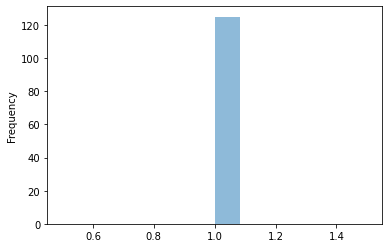

In [14]:
temp = data.loc[data['diabetes'] == 1]['diabetes']
print('People with diabetes: \n')
temp.plot.hist(bins=12, alpha=0.5)

People with high blood pressure: 



<AxesSubplot:ylabel='Frequency'>

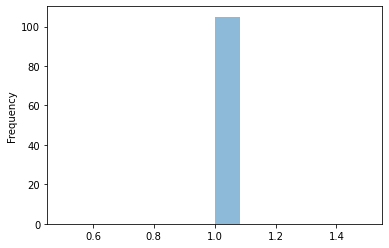

In [21]:
temp = data.loc[data['high_blood_pressure'] == 1]['high_blood_pressure']
print('People with high blood pressure: \n')
temp.plot.hist(bins=12, alpha=0.5)

Males:


<AxesSubplot:ylabel='Frequency'>

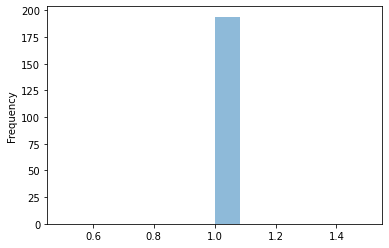

In [19]:
males = data.loc[data['sex'] == 1]['sex']
print('Males:')
males.plot.hist(bins=12, alpha=0.5)

Females:


<AxesSubplot:ylabel='Frequency'>

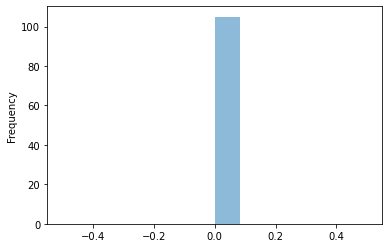

In [24]:
females = data.loc[data['sex'] == 0]['sex']
print('Females:')
females.plot.hist(bins=12, alpha=0.5)

### Splitting into training, validation and testing data

Note: 60% of the data is for training, 20% for validation and the rest for testing.

In [3]:
training_data = data.loc[0:179,]
training_data.tail()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
175,60.0,1,95,0,60,0,337000.0,1.0,138,1,1,146,0
176,69.0,0,1419,0,40,0,105000.0,1.0,135,1,1,147,0
177,49.0,1,69,0,50,0,132000.0,1.0,140,0,0,147,0
178,63.0,1,122,1,60,0,267000.0,1.2,145,1,0,147,0
179,55.0,0,835,0,40,0,279000.0,0.7,140,1,1,147,0


In [4]:
validation_data = data.loc[180:239,]
validation_data.tail()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
235,77.0,1,109,0,50,1,406000.00,1.10,137,1,0,209,0
236,75.0,0,119,0,50,1,248000.00,1.10,148,1,0,209,0
237,70.0,0,232,0,30,0,173000.00,1.20,132,1,0,210,0
238,65.0,1,720,1,40,0,257000.00,1.00,136,0,0,210,0
239,55.0,1,180,0,45,0,263358.03,1.18,137,1,1,211,0


In [5]:
testing_data = data.loc[240:298,]
testing_data.tail()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
294,62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.0,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.0,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.0,1.4,140,1,1,280,0
298,50.0,0,196,0,45,0,395000.0,1.6,136,1,1,285,0


## Neural Network

Note: we will use the same features as in the ID3 algorithm so we can compare which solution is best for this set of features.

In [6]:
# Defining the X and Y matrices
Y = training_data['DEATH_EVENT'].values
X = training_data[['age', 'anaemia', 'diabetes', 'high_blood_pressure', 'smoking', 'DEATH_EVENT']]

# validation and test data
Y_validate = validation_data['DEATH_EVENT'].values
X_validate = validation_data[['age', 'anaemia', 'diabetes', 'high_blood_pressure', 'smoking', 'DEATH_EVENT']]
Y_test = testing_data['DEATH_EVENT'].values
X_test = testing_data[['age', 'anaemia', 'diabetes', 'high_blood_pressure', 'smoking', 'DEATH_EVENT']]

In [7]:
# Initialize a network
def initialize_network(n_inputs, n_hidden, n_outputs, deepness):
    # n_hidden - no of nodes in hidden layer
    # n_outputs - no of outputs
    # n_inputs - no of inputs
    # deepness - no of hidden layers
    network = list()
    for i in range(deepness):
        hidden_layer = [{'weights':[np.random.rand() for i in range(n_inputs + 1)]} for i in range(n_hidden)]
        network.append(hidden_layer)
    output_layer = [{'weights':[np.random.rand() for i in range(n_hidden + 1)]} for i in range(n_outputs)]
    network.append(output_layer)
    return network

# sum inputs
def activate(weights, inputs):
    activation = weights[-1]
    for i in range(len(weights)-1):
        activation += weights[i] * inputs[i]
    return activation

# sigmoid
def transfer(activation):
    return 1.0 / (1.0 + exp(-activation))

# sigmoid derivative
def transfer_derivative(output):
    return output * (1.0 - output)

# Forward propagate input to a network output
def forward_propagate(network, row):
    inputs = row
    for layer in network:
        new_inputs = []
        for neuron in layer:
            activation = activate(neuron['weights'], inputs)
            neuron['output'] = transfer(activation)
            new_inputs.append(neuron['output'])
        inputs = new_inputs
    return inputs
 
# Backpropagate error and store in neurons
def backward_propagate_error(network, expected):
    for i in reversed(range(len(network))):
        layer = network[i]
        errors = list()
        if i != len(network)-1:
            for j in range(len(layer)):
                error = 0.0
                for neuron in network[i + 1]:
                    error += (neuron['weights'][j] * neuron['delta'])
                errors.append(error)
        else:
            for j in range(len(layer)):
                neuron = layer[j]
                errors.append(expected - neuron['output'])
        for j in range(len(layer)):
            neuron = layer[j]
            neuron['delta'] = errors[j] * transfer_derivative(neuron['output'])
            
# update weights
def update_weights(network, row, l_rate):
    for i in range(len(network)):
        inputs = row[:-1]
        if i != 0:
            inputs = [neuron['output'] for neuron in network[i - 1]]
        for neuron in network[i]:
            for j in range(len(inputs)):
                neuron['weights'][j] += l_rate * neuron['delta'] * inputs[j]
            neuron['weights'][-1] += l_rate * neuron['delta']
            
# train network
def train_network(network, train, l_rate, n_epoch, e):
    for i in range(n_epoch):
        for row in train:
            outputs = forward_propagate(network, row)
            backward_propagate_error(network, row[-1])
            update_weights(network, row, l_rate)
        
# Make a prediction with a network
def predict(network, row):
    ans = np.array([])
    outputs = forward_propagate(network, row)
    for i in outputs:
        if i > 0.5:
            ans = np.append(ans, 1)
        else:
            ans = np.append(ans, 0)
    return ans

# calls predict() to make predictions
def make_prediction(network, data):
    prediction = []
    y = []
    for i in data:
        y.append(i[len(i)-1])
    for i in range(len(data)):
        row = data[i]
        prediction.append(predict(network, row))
    
    result = confusion_matrix(y, prediction)
    print('Confusion matrix: \n', result)
    print('\nAccuracy: ', (result[0,0]+result[1,1])/len(y)*100,'%')

# splitting up data
# data = df[['x1', 'x2', 'class']].to_numpy()
# training = data[0:60]
# validation = data[60:80]
# testing = data[80:100]

In [8]:
# initialize network with 5 inputs, 2 hidden layers with 5 nodes each, 1 output
network = initialize_network(5, 5, 1, 2)
print('network: \n', network)

network: 
 [[{'weights': [0.6347119901590556, 0.9043916045571427, 0.598598542695881, 0.6653325226270981, 0.6991490804024908, 0.47051398186824056]}, {'weights': [0.9479364901422792, 0.018514819472698063, 0.7460883324004371, 0.7533811590962438, 0.005538062318009573, 0.9040347483471713]}, {'weights': [0.6026919904990774, 0.9020569417924761, 0.6194423927364396, 0.10399028234528229, 0.797905307823364, 0.9508267533435185]}, {'weights': [0.7775390625947809, 0.8357649931265638, 0.9647892184311317, 0.8357134940011579, 0.9422580552855936, 0.8083942878036356]}, {'weights': [0.7566950905230345, 0.8655465184948299, 0.9782195062017066, 0.015480675424820345, 0.6844076044643327, 0.15477590096581129]}], [{'weights': [0.8345258788699508, 0.5678330029439085, 0.6735105144257494, 0.5962895206317105, 0.4307908249625494, 0.6987085427853499]}, {'weights': [0.9721957721944534, 0.14898893208587038, 0.43599673864422506, 0.4695205116940062, 0.6642507019754521, 0.8543282451389678]}, {'weights': [0.1622326795970821

In [9]:
# training the network
to_input = X.to_numpy()
train_network(network, to_input, 0.01, 1000, 0.0001)

In [11]:
# validate
to_validate = X_validate.to_numpy()
make_prediction(network, to_validate)

Confusion matrix: 
 [[47  0]
 [13  0]]

Accuracy:  78.33333333333333 %


In [57]:
# playing with hyperparameters
new_network = initialize_network(5, 5, 1, 2)
train_network(new_network, to_input, 0.001, 75, 0.0001)
make_prediction(new_network, to_validate)

Confusion matrix: 
 [[47  0]
 [13  0]]

Accuracy:  78.33333333333333 %


In [58]:
# comparing the networks
print('comparing the two networks:')
to_test = X_test.to_numpy()
print('first one:')
make_prediction(network, to_test)
print('versus the tuned one:')
make_prediction(new_network, to_test)

comparing the two networks:
first one:
Confusion matrix: 
 [[56  0]
 [ 3  0]]

Accuracy:  94.91525423728814 %
versus the tuned one:
Confusion matrix: 
 [[56  0]
 [ 3  0]]

Accuracy:  94.91525423728814 %


Our final accuracy is 94.92%